In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_columns', 50)
plt.style.use('bmh')
import regex as re

C:\Users\katal\Documents\ProgramsPackages\lib\site-packages\matplotlib\__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


### Working with dates

In [2]:
dt = pd.read_csv('data/calendar.csv')

In [3]:
dt.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,1944,1945,1946,1947,1948,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968
date,2011-01-29,2011-01-30,2011-01-31,2011-02-01,2011-02-02,2011-02-03,2011-02-04,2011-02-05,2011-02-06,2011-02-07,2011-02-08,2011-02-09,2011-02-10,2011-02-11,2011-02-12,2011-02-13,2011-02-14,2011-02-15,2011-02-16,2011-02-17,2011-02-18,2011-02-19,2011-02-20,2011-02-21,2011-02-22,...,2016-05-26,2016-05-27,2016-05-28,2016-05-29,2016-05-30,2016-05-31,2016-06-01,2016-06-02,2016-06-03,2016-06-04,2016-06-05,2016-06-06,2016-06-07,2016-06-08,2016-06-09,2016-06-10,2016-06-11,2016-06-12,2016-06-13,2016-06-14,2016-06-15,2016-06-16,2016-06-17,2016-06-18,2016-06-19
wm_yr_wk,11101,11101,11101,11101,11101,11101,11101,11102,11102,11102,11102,11102,11102,11102,11103,11103,11103,11103,11103,11103,11103,11104,11104,11104,11104,...,11617,11617,11618,11618,11618,11618,11618,11618,11618,11619,11619,11619,11619,11619,11619,11619,11620,11620,11620,11620,11620,11620,11620,11621,11621
weekday,Saturday,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Monday,Tuesday,...,Thursday,Friday,Saturday,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
wday,1,2,3,4,5,6,7,1,2,3,4,5,6,7,1,2,3,4,5,6,7,1,2,3,4,...,6,7,1,2,3,4,5,6,7,1,2,3,4,5,6,7,1,2,3,4,5,6,7,1,2
month,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,...,5,5,5,5,5,5,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
year,2011,2011,2011,2011,2011,2011,2011,2011,2011,2011,2011,2011,2011,2011,2011,2011,2011,2011,2011,2011,2011,2011,2011,2011,2011,...,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016
d,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,...,d_1945,d_1946,d_1947,d_1948,d_1949,d_1950,d_1951,d_1952,d_1953,d_1954,d_1955,d_1956,d_1957,d_1958,d_1959,d_1960,d_1961,d_1962,d_1963,d_1964,d_1965,d_1966,d_1967,d_1968,d_1969
event_name_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SuperBowl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ValentinesDay,NaN,NaN,NaN,NaN,NaN,NaN,PresidentsDay,NaN,...,NaN,NaN,NaN,NaN,MemorialDay,NaN,NaN,NBAFinalsStart,NaN,NaN,NaN,NaN,Ramadan starts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NBAFinalsEnd
event_type_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sporting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cultural,NaN,NaN,NaN,NaN,NaN,NaN,National,NaN,...,NaN,NaN,NaN,NaN,National,NaN,NaN,Sporting,NaN,NaN,NaN,NaN,Religious,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sporting
event_name_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Father's day


In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
date            1969 non-null object
wm_yr_wk        1969 non-null int64
weekday         1969 non-null object
wday            1969 non-null int64
month           1969 non-null int64
year            1969 non-null int64
d               1969 non-null object
event_name_1    162 non-null object
event_type_1    162 non-null object
event_name_2    5 non-null object
event_type_2    5 non-null object
snap_CA         1969 non-null int64
snap_TX         1969 non-null int64
snap_WI         1969 non-null int64
dtypes: int64(7), object(7)
memory usage: 215.4+ KB


In [28]:
def add_date(df, col_name, drop=False, time = False):
    col = df[col_name]
    col_dtype = col.dtype

    if isinstance(col_dtype, pd.core.dtypes.dtypes.DatetimeTZDtype):
        col_dtype = np.datetime64

    if not np.issubdtype(col_dtype, np.datetime64):
        df[col_name] = col = pd.to_datetime(col, infer_datetime_format=True)

    targ_pre = re.sub('[Dd]ate$', '', col_name)
    attr = ['Week', 'Day', 'Dayofyear', 'Is_month_end',
           'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start']
    if time: attr = attr + ['Hour', 'Minute', 'Second']
    for n in attr: df[targ_pre + n] = getattr(col.dt, n.lower())    
    df[targ_pre + 'Elapsed'] = col.astype(np.int64) // 10 ** 9
    if drop: df.drop(col_name, axis=1, inplace=True)

In [29]:
add_date(dt, 'date')

In [30]:
dt.head(3)

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,Week,Day,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0,4,29,29,False,False,False,False,False,False,1296259200
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0,4,30,30,False,False,False,False,False,False,1296345600
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0,5,31,31,True,False,False,False,False,False,1296432000


**Maybe later it's better to redefine 'Is_month_end', 'Is.._start' intervals**

In [31]:
event_cols = [c for c in dt.columns if 'event' in c]
for i in event_cols:
    print(f'col: {i}. Unique: {dt[i].unique()}')

col: event_name_1. Unique: [nan 'SuperBowl' 'ValentinesDay' 'PresidentsDay' 'LentStart' 'LentWeek2'
 'StPatricksDay' 'Purim End' 'OrthodoxEaster' 'Pesach End' 'Cinco De Mayo'
 "Mother's day" 'MemorialDay' 'NBAFinalsStart' 'NBAFinalsEnd'
 "Father's day" 'IndependenceDay' 'Ramadan starts' 'Eid al-Fitr'
 'LaborDay' 'ColumbusDay' 'Halloween' 'EidAlAdha' 'VeteransDay'
 'Thanksgiving' 'Christmas' 'Chanukah End' 'NewYear' 'OrthodoxChristmas'
 'MartinLutherKingDay' 'Easter']
col: event_type_1. Unique: [nan 'Sporting' 'Cultural' 'National' 'Religious']
col: event_name_2. Unique: [nan 'Easter' 'Cinco De Mayo' 'OrthodoxEaster' "Father's day"]
col: event_type_2. Unique: [nan 'Cultural' 'Religious']


In [9]:
pd.core.arrays.categorical.CategoricalAccessor??

### What to do with events?
- Maybe to add 'is_event_day' boolean

In [32]:
dt['is_event_day'] = ~(dt['event_name_1'].isna() | dt['event_name_2'].isna()) 

In [33]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 25 columns):
date                1969 non-null datetime64[ns]
wm_yr_wk            1969 non-null int64
weekday             1969 non-null object
wday                1969 non-null int64
month               1969 non-null int64
year                1969 non-null int64
d                   1969 non-null object
event_name_1        162 non-null object
event_type_1        162 non-null object
event_name_2        5 non-null object
event_type_2        5 non-null object
snap_CA             1969 non-null int64
snap_TX             1969 non-null int64
snap_WI             1969 non-null int64
Week                1969 non-null int64
Day                 1969 non-null int64
Dayofyear           1969 non-null int64
Is_month_end        1969 non-null bool
Is_month_start      1969 non-null bool
Is_quarter_end      1969 non-null bool
Is_quarter_start    1969 non-null bool
Is_year_end         1969 non-null bool
Is_year_sta

In [34]:
dtypes_dt = {'wm_yr_wk':'int16', 'weekday':'category','wday':'category','month':'category','year':'category',
            'event_name_1':'category','event_type_1':'category','event_name_2':'category','event_type_2':'category',
            'snap_CA':'category','snap_TX':'category','snap_WI':'category', 'Week':'category','Day':'category','Dayofyear':'int16',
            'Elapsed':'int64'}

In [35]:
for col_name, col_type in dtypes_dt.items():
    if col_type == 'category':
        dt[col_name] = dt[col_name].astype(col_type).cat.codes + int('event' in col_name)
    else:
        dt[col_name] = dt[col_name].astype(col_type)

In [36]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 25 columns):
date                1969 non-null datetime64[ns]
wm_yr_wk            1969 non-null int16
weekday             1969 non-null int8
wday                1969 non-null int8
month               1969 non-null int8
year                1969 non-null int8
d                   1969 non-null object
event_name_1        1969 non-null int8
event_type_1        1969 non-null int8
event_name_2        1969 non-null int8
event_type_2        1969 non-null int8
snap_CA             1969 non-null int8
snap_TX             1969 non-null int8
snap_WI             1969 non-null int8
Week                1969 non-null int8
Day                 1969 non-null int8
Dayofyear           1969 non-null int16
Is_month_end        1969 non-null bool
Is_month_start      1969 non-null bool
Is_quarter_end      1969 non-null bool
Is_quarter_start    1969 non-null bool
Is_year_end         1969 non-null bool
Is_year_start       1

In [37]:
dt.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,Week,Day,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed,is_event_day
0,2011-01-29,11101,2,0,0,0,d_1,0,0,0,0,0,0,0,3,28,29,False,False,False,False,False,False,1296259200,False
1,2011-01-30,11101,3,1,0,0,d_2,0,0,0,0,0,0,0,3,29,30,False,False,False,False,False,False,1296345600,False
2,2011-01-31,11101,1,2,0,0,d_3,0,0,0,0,0,0,0,4,30,31,True,False,False,False,False,False,1296432000,False
3,2011-02-01,11101,5,3,1,0,d_4,0,0,0,0,1,1,0,4,0,32,False,True,False,False,False,False,1296518400,False
4,2011-02-02,11101,6,4,1,0,d_5,0,0,0,0,1,0,1,4,1,33,False,False,False,False,False,False,1296604800,False


In [97]:
# dt.to_csv('data/cleaning/cal_0.1.csv')

- Lets for now just categorify them

### SNAP_cols

In [38]:
snap_cols = [c for c in dt.columns if 'snap' in c]
dt[snap_cols].info() # Shoudl change to bool dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 3 columns):
snap_CA    1969 non-null int8
snap_TX    1969 non-null int8
snap_WI    1969 non-null int8
dtypes: int8(3)
memory usage: 5.8 KB


In [39]:
dt[snap_cols] = dt[snap_cols].astype(bool)

In [40]:
dt[snap_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 3 columns):
snap_CA    1969 non-null bool
snap_TX    1969 non-null bool
snap_WI    1969 non-null bool
dtypes: bool(3)
memory usage: 5.8 KB


**Maybe later also we should add extremely concrete features like
is_event_in_the_end_of month, is_event_in_the_start_of_month'
big_event etc.**

### Is it allowed to use external data?

### Features ideas:
- is item available

In [306]:
sp = pd.read_csv('data/sell_prices.csv')

In [307]:
sp.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,6841096,6841097,6841098,6841099,6841100,6841101,6841102,6841103,6841104,6841105,6841106,6841107,6841108,6841109,6841110,6841111,6841112,6841113,6841114,6841115,6841116,6841117,6841118,6841119,6841120
store_id,CA_1,CA_1,CA_1,CA_1,CA_1,CA_1,CA_1,CA_1,CA_1,CA_1,CA_1,CA_1,CA_1,CA_1,CA_1,CA_1,CA_1,CA_1,CA_1,CA_1,CA_1,CA_1,CA_1,CA_1,CA_1,...,WI_3,WI_3,WI_3,WI_3,WI_3,WI_3,WI_3,WI_3,WI_3,WI_3,WI_3,WI_3,WI_3,WI_3,WI_3,WI_3,WI_3,WI_3,WI_3,WI_3,WI_3,WI_3,WI_3,WI_3,WI_3
item_id,HOBBIES_1_001,HOBBIES_1_001,HOBBIES_1_001,HOBBIES_1_001,HOBBIES_1_001,HOBBIES_1_001,HOBBIES_1_001,HOBBIES_1_001,HOBBIES_1_001,HOBBIES_1_001,HOBBIES_1_001,HOBBIES_1_001,HOBBIES_1_001,HOBBIES_1_001,HOBBIES_1_001,HOBBIES_1_001,HOBBIES_1_001,HOBBIES_1_001,HOBBIES_1_001,HOBBIES_1_001,HOBBIES_1_001,HOBBIES_1_001,HOBBIES_1_001,HOBBIES_1_001,HOBBIES_1_001,...,FOODS_3_827,FOODS_3_827,FOODS_3_827,FOODS_3_827,FOODS_3_827,FOODS_3_827,FOODS_3_827,FOODS_3_827,FOODS_3_827,FOODS_3_827,FOODS_3_827,FOODS_3_827,FOODS_3_827,FOODS_3_827,FOODS_3_827,FOODS_3_827,FOODS_3_827,FOODS_3_827,FOODS_3_827,FOODS_3_827,FOODS_3_827,FOODS_3_827,FOODS_3_827,FOODS_3_827,FOODS_3_827
wm_yr_wk,11325,11326,11327,11328,11329,11330,11331,11332,11333,11334,11335,11336,11337,11338,11339,11340,11341,11342,11343,11344,11345,11346,11347,11348,11349,...,11549,11550,11551,11552,11601,11602,11603,11604,11605,11606,11607,11608,11609,11610,11611,11612,11613,11614,11615,11616,11617,11618,11619,11620,11621
sell_price,9.58,9.58,8.26,8.26,8.26,8.26,8.26,8.26,8.26,8.26,8.26,8.26,8.26,8.26,8.26,8.26,8.26,8.26,8.26,8.26,8.26,8.26,8.26,8.26,8.26,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [308]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841121 entries, 0 to 6841120
Data columns (total 4 columns):
store_id      object
item_id       object
wm_yr_wk      int64
sell_price    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 208.8+ MB


### Ideas fo sp:
- Store_type
- np.log(sell_price)?
- item_type

**I guess, we really need some exotic features later on**

In [309]:
sp['State'] = sp['store_id'].apply(lambda x: x.split('_')[0])
sp['item_type'] = sp['item_id'].apply(lambda x: x.split('_')[0])

In [44]:
item_types = sp['item_type'].unique()

In [45]:
len(item_types)

3

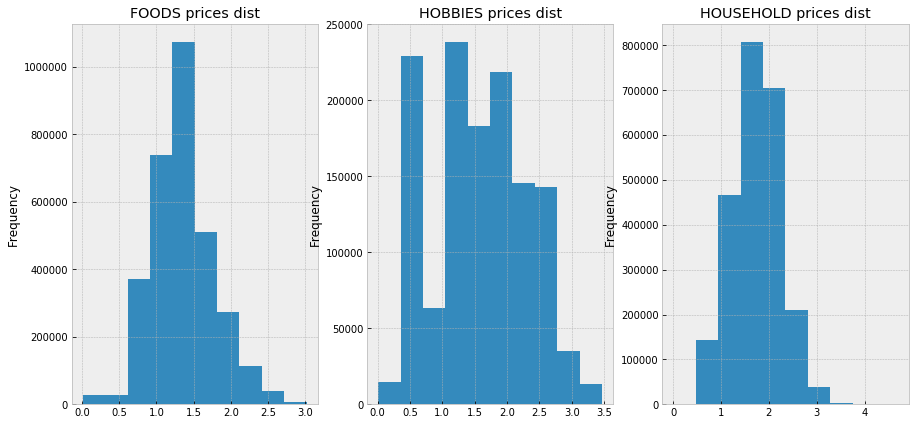

In [46]:
fig, axes = plt.subplots(1,3, figsize=(15,7))
ax_id = 0
for i,d in sp.groupby('item_type'):
    d['sell_price'].apply(np.log1p).plot(kind='hist', ax=axes[ax_id], title=f'{i} prices dist')
    ax_id += 1

#plt.legend(item_types)
plt.show()

In [47]:
# sp.to_csv('data/cleaning/sp_0.1.csv')

In [310]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841121 entries, 0 to 6841120
Data columns (total 6 columns):
store_id      object
item_id       object
wm_yr_wk      int64
sell_price    float64
State         object
item_type     object
dtypes: float64(1), int64(1), object(4)
memory usage: 313.2+ MB


In [311]:
sp_dtypes = {'store_id':'category','item_id':'category', 'wm_yr_wk':'int16','State':'category','item_type':'category'}
for col_name, col_type in sp_dtypes.items():
    if col_type == 'category':
        sp[col_name] = sp[col_name].astype(col_type).cat.codes 

# Sales train validation

In [290]:
stv = pd.read_csv('data/sales_train_validation.csv')

In [291]:
stv.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,...,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,4,2,3,0,1,2,0,0,0,1,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,0,1,2,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,3,1,2,1,3,1,0,2,5,4,2,0,3,0,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4,0,1,4,0,1,0,1,0,1,1,2,0,1,1,2,1,1,0,1,1,2,2,2,4


In [292]:
stv.iloc[:,:6].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Data columns (total 6 columns):
id          30490 non-null object
item_id     30490 non-null object
dept_id     30490 non-null object
cat_id      30490 non-null object
store_id    30490 non-null object
state_id    30490 non-null object
dtypes: object(6)
memory usage: 1.4+ MB


In [293]:
dtypes_stv = {'item_id':'category','dept_id':'category','cat_id':'category','store_id':'category','state_id':'category'}

In [294]:
for col_name, col_type in dtypes_stv.items():
    stv[col_name] = stv[col_name].astype(col_type).cat.codes 

In [295]:
stv.iloc[:,:6].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Data columns (total 6 columns):
id          30490 non-null object
item_id     30490 non-null int16
dept_id     30490 non-null int8
cat_id      30490 non-null int8
store_id    30490 non-null int8
state_id    30490 non-null int8
dtypes: int16(1), int8(4), object(1)
memory usage: 416.9+ KB


In [17]:
# stv.to_csv('data/cleaning/stv_0.1.csv')

In [18]:
# Merging together

In [296]:
# First trying with small amout of data
stv_part = stv.iloc[:200,]

In [297]:
stv_part = pd.melt(stv_part, id_vars = ['id','item_id','dept_id','cat_id','state_id'], value_vars =[f'd_{day}' for day in range(1,1914)], var_name='d',value_name='sales')

In [298]:
stv_part.head()

,id,item_id,dept_id,cat_id,state_id,d,sales
0,HOBBIES_1_001_CA_1_validation,1437,3,1,0,d_1,0
1,HOBBIES_1_002_CA_1_validation,1438,3,1,0,d_1,0
2,HOBBIES_1_003_CA_1_validation,1439,3,1,0,d_1,0
3,HOBBIES_1_004_CA_1_validation,1440,3,1,0,d_1,0
4,HOBBIES_1_005_CA_1_validation,1441,3,1,0,d_1,0


In [299]:
stv_part = stv_part.merge(dt, how='inner', on = 'd')

In [300]:
stv_part['store_id'] = stv_part['id'].apply(lambda x: x.split('_')[-3] + '_' +x.split('_')[-2])

In [301]:
stv_part['store_id'] = stv_part['store_id'].astype('category').cat.codes

In [302]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841121 entries, 0 to 6841120
Data columns (total 4 columns):
store_id      object
item_id       object
wm_yr_wk      int64
sell_price    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 208.8+ MB


In [303]:
stv_part.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 382600 entries, 0 to 382599
Data columns (total 32 columns):
id                  382600 non-null object
item_id             382600 non-null int16
dept_id             382600 non-null int8
cat_id              382600 non-null int8
state_id            382600 non-null int8
d                   382600 non-null object
sales               382600 non-null int64
date                382600 non-null datetime64[ns]
wm_yr_wk            382600 non-null int16
weekday             382600 non-null int8
wday                382600 non-null int8
month               382600 non-null int8
year                382600 non-null int8
event_name_1        382600 non-null int8
event_type_1        382600 non-null int8
event_name_2        382600 non-null int8
event_type_2        382600 non-null int8
snap_CA             382600 non-null bool
snap_TX             382600 non-null bool
snap_WI             382600 non-null bool
Week                382600 non-null int8
Day        

In [312]:
stv_part = stv_part.merge(sp, on=['store_id','item_id','wm_yr_wk'])

In [313]:
stv_part.shape

(308792, 35)

In [314]:
stv_part.head().T

,0,1,2,3,4
id,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008_CA_1_validation
item_id,1444,1444,1444,1444,1444
dept_id,3,3,3,3,3
cat_id,1,1,1,1,1
state_id,0,0,0,0,0
d,d_1,d_2,d_3,d_4,d_5
sales,12,15,0,0,0
date,2011-01-29 00:00:00,2011-01-30 00:00:00,2011-01-31 00:00:00,2011-02-01 00:00:00,2011-02-02 00:00:00
wm_yr_wk,11101,11101,11101,11101,11101
weekday,2,3,1,5,6


In [187]:
stv_part.to_csv('stv_part_200.csv')

In [215]:
# Polynomial regression
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

In [315]:
unique_items = stv_part['item_id'].unique()

In [317]:
x, y, d = stv_part.drop(['d','id','sales','date'], axis=1), stv_part['sales'], stv_part['d']
valid_idx = 250000

In [318]:
poly = PolynomialFeatures(degree = 2)
x_ = poly.fit_transform(x)

In [319]:
train_x, valid_x, train_y, valid_y = x_[:valid_idx, ], x_[valid_idx:, ], y.iloc[:valid_idx, ], y.iloc[valid_idx:, ]

In [357]:
lrg = linear_model.LinearRegression()

In [358]:
lrg.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [356]:
mean_squared_error(valid_y, lrg.predict(valid_x))

1.3642839491572445e+23

In [354]:
lrg = linear_model.LinearRegression(normalize=True)

In [355]:
lrg.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [359]:
mean_squared_error(valid_y, lrg.predict(valid_x))

8.435378629175952

In [323]:
lrg2 = linear_model.LassoCV()

In [325]:
lrg2.fit(train_x, train_y)

LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [326]:
mean_squared_error(valid_y, lrg2.predict(valid_x))

8.835132953862256

In [327]:
lrg3 = linear_model.Ridge()

In [328]:
lrg3.fit(train_x, train_y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [330]:
mean_squared_error(valid_y, lrg3.predict(valid_x))

8.742008349343102

In [349]:
# 10.83, 10.87, 10.84 when items = 100 

In [334]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

In [333]:
tscv = TimeSeriesSplit(n_splits=5)

In [347]:
a = GridSearchCV(linear_model.Lasso(), {'alpha':[1e-15, 1e-10, 1e-8]}, cv=tscv, scoring='neg_mean_squared_error')

In [348]:
a.fit(train_x, train_y)

GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [350]:
a.best_score_

-8.528668202103772

In [352]:
a.cv_results_

{'mean_fit_time': array([52.296446, 51.179605, 51.283361]),
 'std_fit_time': array([26.611348, 25.768869, 25.631131]),
 'mean_score_time': array([0.069464, 0.066104, 0.057284]),
 'std_score_time': array([0.010135, 0.007633, 0.006093]),
 'param_alpha': masked_array(data=[1e-15, 1e-10, 1e-08],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 1e-15}, {'alpha': 1e-10}, {'alpha': 1e-08}],
 'split0_test_score': array([-13.808723, -13.808718, -13.808168]),
 'split1_test_score': array([-7.900187, -7.900185, -7.900044]),
 'split2_test_score': array([-7.574535, -7.574534, -7.574452]),
 'split3_test_score': array([-6.802453, -6.802452, -6.802415]),
 'split4_test_score': array([-6.558259, -6.558259, -6.558262]),
 'mean_test_score': array([-8.528831, -8.52883 , -8.528668]),
 'std_test_score': array([2.68502 , 2.685018, 2.684819]),
 'rank_test_score': array([3, 2, 1])}

In [353]:
a.best_estimator_

Lasso(alpha=1e-08, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [360]:
a.best_estimator_.coef_

array([ 0.      ,  0.003162,  0.      ,  0.      , ..., -0.203965,  0.      ,  0.      ,  0.      ])

In [361]:
# Relative feature importances

In [367]:
from sklearn.ensemble import RandomForestRegressor

In [380]:
rf = RandomForestRegressor(random_state=17)
rf.fit(x, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=17, verbose=0,
                      warm_start=False)

In [371]:
COLOR = 'white'
color_cycle = cycle(['#99FF66', '#FFFFFF'])
plt.rcParams['axes.facecolor'] = '#A6A6A6'
plt.rcParams['axes.edgecolor']='#aaaaaa'
plt.rcParams['axes.linewidth']=0.3
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.rcParams['font.size'] = 13.0
plt.rcParams['axes.grid'] = False

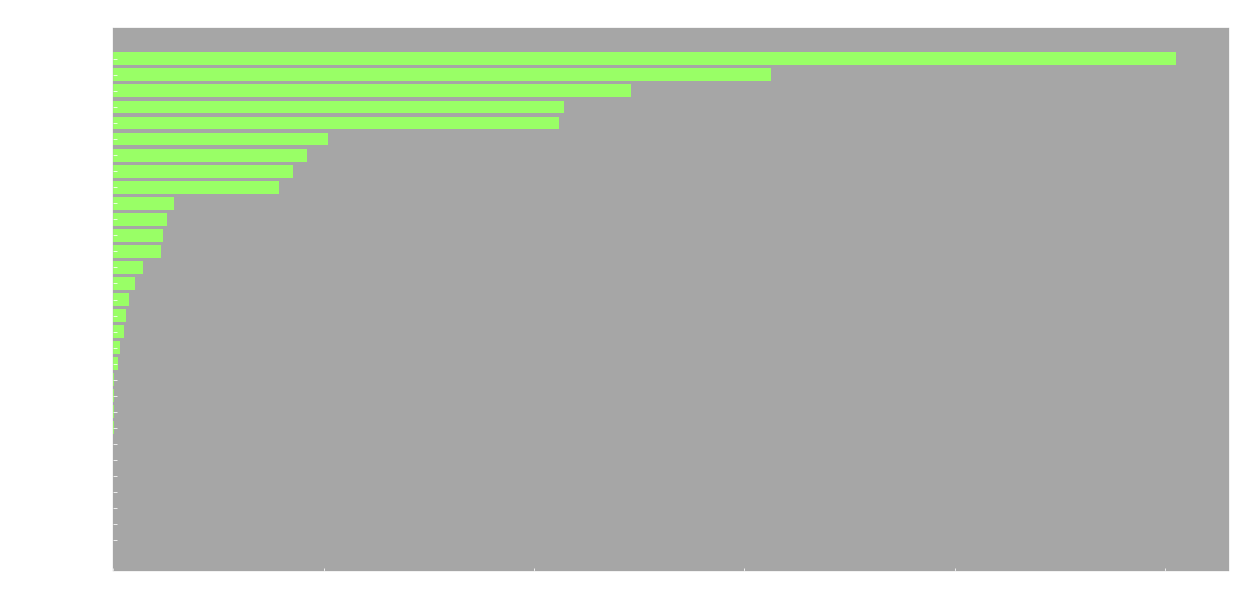

In [381]:
features = x.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(20,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='#99FF66', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [365]:
importances = a.best_estimator_.coef_
indices = np.argsort(importances)

In [366]:
x_[indices]

array([[1.000e+00, 1.474e+03, 3.000e+00, 1.000e+00, ..., 3.170e+00, 0.000e+00, 0.000e+00, 1.000e+00],
       [1.000e+00, 1.491e+03, 3.000e+00, 1.000e+00, ..., 7.440e+00, 0.000e+00, 0.000e+00, 1.000e+00],
       [1.000e+00, 1.448e+03, 3.000e+00, 1.000e+00, ..., 5.980e+00, 0.000e+00, 0.000e+00, 1.000e+00],
       [1.000e+00, 1.523e+03, 3.000e+00, 1.000e+00, ..., 7.880e+00, 0.000e+00, 0.000e+00, 1.000e+00],
       ...,
       [1.000e+00, 1.518e+03, 3.000e+00, 1.000e+00, ..., 3.670e+00, 0.000e+00, 0.000e+00, 1.000e+00],
       [1.000e+00, 1.537e+03, 3.000e+00, 1.000e+00, ..., 6.440e+00, 0.000e+00, 0.000e+00, 1.000e+00],
       [1.000e+00, 1.486e+03, 3.000e+00, 1.000e+00, ..., 9.840e+00, 0.000e+00, 0.000e+00, 1.000e+00],
       [1.000e+00, 1.620e+03, 3.000e+00, 1.000e+00, ..., 4.600e-01, 0.000e+00, 0.000e+00, 1.000e+00]])